# Introducrtion to Machine Learning: Assignment #1
## Submission date: 28\5\2024, 23:59.
### Topics:
- Naïve bayes
- Gaussian Bayes
- Parzen Windows
- KNN

Submitted by:

 **Bashar Beshoti + 207370248

 **Ayal Kaabia + 322784760

**Assignment Instruction:**

· Submissions in pairs only.

· Try to keep the code as clean, concise, and short as possible

· If you wish to work in your IDE, you can, but you **must**,  insert the script back to the matching cells of the notebook and run the code. <br/>Only the notebook will be submitted in moodle (in `.ipynb` format).

· <font color='red'>Please write your answers to question in red</font>.

**Important:** All plots, results and outputs should be included in the notebook as the cells' outputs (run all cells and do not clear the output). <br/>

**Important:** Your submission must be entirely your own. Any attempts of plagiarism (including ChatGPT) will lead to grade 0 and disciplinary actions.


## Customizing Colab
This is an optional section for you convenience:<br/>
Go to Tools -> Settings -> editor<br/>
There, you can adjust fonts, add line numbers, change indentations.

## Question 1 - Bayesian Classification Assuming Gaussian distribution
You are requested by the Central Bank of America to detect between three types of bankotes: fake, fine, and good. The dataset consists of 5 features which were obtained from the digitized images of banknotes.<br/>
Since the data is continuous, you will implement Gaussian bayes and compare to Gaussian naïve bayes.




import libraries

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Load** the wine dataset from https://sharon.srworkspace.com/ml/datasets/hw1/banknote_authentication.csv

In [46]:
# Implement here
url = "https://sharon.srworkspace.com/ml/datasets/hw1/banknote_authentication.csv"
df = pd.read_csv(url)
print(df.shape)
df.head(3)

(600, 6)


,contrast,skew,curtosis,heat,cent_col,Class
0,2.446909,2.702995,0.832495,0.531505,-1.734316,0
1,0.870104,2.248493,-1.496408,1.383379,-1.216271,0
2,-1.930227,-2.708964,1.031232,-0.125341,0.683788,2


Check if there is even potential for gaussian assumption to work here, by plotting the density of the features (without target label!), using plotting for data frames. <br/>
Should gaussian bayes work here? <br/>
<font color='red'>Write here your answer and explain it</font> </br>
<font color='red'><b>Trick - Since each plot contain most of the data in:
It is characterized by its symmetric, bell-shaped curve that is defined by two parameters: the mean (μ) and the standard deviation (σ). The mean determines the center of the distribution, and the standard deviation controls the spread or width of the distribution.
</b>
 </font>

 <font color='green'> solved </font>

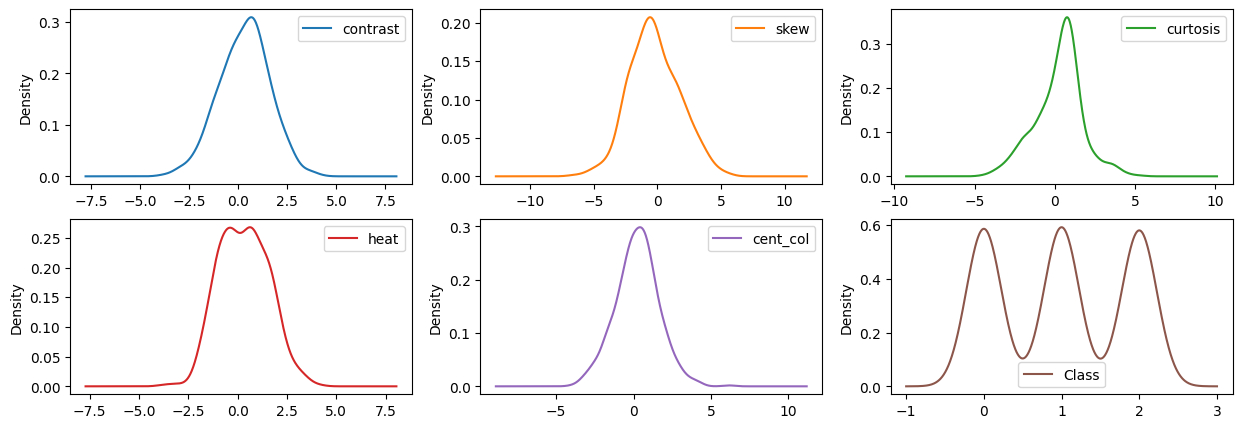

In [47]:
df.plot(kind='density', subplots=True, layout=(2,3), figsize=(15, 5), sharex=False)
plt.show()

Convert the data to numpy and split the data to 80% training and 20% test with random state of 33. Make sure to maintain the dataset balanced, using stratify=y, in train_test_split method.
<br/>Note that the data frame currently includes the labels as well.

In [48]:
  from sklearn.model_selection import train_test_split
  # Implement here
  # Convert the data to numpy and split
  numpy_array = df.values
  data = numpy_array[:, :-1]
  labels = numpy_array[:, -1]

  # Split the data into train and test sets - REQUIREMENT
  x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, shuffle=True, random_state=33, stratify=labels)

  # printing x_train and x_test dimensions
  print(x_train.shape)
  print(x_test.shape)

(480, 5)
(120, 5)


Implement the functions below. <br/>Both get test data $X\in\mathbb{R}^{n\times d}$ and returns the predicted classes (vector sized n), but the naïve bayes assumes that the features are independent.<br/>
Hint for efficient implementation: you don't need more than one loop, use numpy!

In [49]:
def classify_point_gaussian_bayes(test_data):
    result = np.unique(y_train).astype(int)
    class_stats = [(np.mean(x_train[y_train == c], axis=0), np.cov(x_train[y_train == c], rowvar=False), np.log(np.bincount(y_train.astype(int))[c] / len(y_train))) for c in result]

    log_likelihoods = np.zeros((test_data.shape[0], len(result)))

    for idx, (mean, covariance, log_prior) in enumerate(class_stats):
        diff = test_data - mean
        inv_covariance = np.linalg.inv(covariance + 1e-6)
        exponent = -0.5 * np.sum(diff @ inv_covariance * diff, axis=1)
        log_det_covariance = np.log(np.linalg.det(covariance + 1e-6))
        log_likelihoods[:, idx] = exponent - 0.5 * log_det_covariance + log_prior

    return result[np.argmax(log_likelihoods, axis=1)]

# =========================================================================================================

def classify_point_gaussian_naive_bayes(test_data):
    result = np.unique(y_train).astype(int)
    class_stats = [(np.mean(x_train[y_train == c], axis=0), np.var(x_train[y_train == c], axis=0), np.log(np.bincount(y_train.astype(int))[c] / len(y_train))) for c in result]

    log_likelihoods = np.zeros((test_data.shape[0], len(result)))

    for idx, (mean, variance, log_prior) in enumerate(class_stats):
        log_likelihood = -0.5 * np.sum(((test_data - mean) ** 2) / variance + np.log(variance), axis=1)
        log_likelihoods[:, idx] = log_likelihood + log_prior

    return result[np.argmax(log_likelihoods, axis=1)]


For both GB and GNB, we will look at train vs test. Answer the following:
- Which model achieved better learning? Why?
- Could the other model be sometimes better? How, for example?

<font color='red'>Write here your answers and explain</font>
<br/>Hint: Use the next section, for visualization the correlation matrix on the train.  

<font color='red'><b> A. Gaussian Bayes is supiror more than Gaussian Naive Bayes. since Gaussian Naive Bayes identify each feature as an independent, provides no such related information about class. This leads to less ability to learn things with respect to object features about the object itself. </b></font>

<font color='red'><b> B. Gaussian Naive Bayes would do better than Gaussian  Bayes in a case where features doesn't provide a good information to train with and learn about the object. for example, a feature with high noise aka high covereance value for feature. This leads the machine to unsuitable adjust to the features on the class.</b></font>


 <font color='green'> solved </font>

In [50]:
# Reminder: success rate is the precentage of correctly classified data within the number of all data in the test set.

dict1 = {'GB': [], 'GNB': []}

accs = classify_point_gaussian_bayes(x_train)
dict1['GB'].append(np.count_nonzero(accs == y_train) / len(y_train))

accs = classify_point_gaussian_bayes(x_test)
dict1['GB'].append(np.count_nonzero(accs == y_test) / len(y_test))

accs = classify_point_gaussian_naive_bayes(x_train)
dict1['GNB'].append(np.count_nonzero(accs == y_train) / len(y_train))

accs = classify_point_gaussian_naive_bayes(x_test)
dict1['GNB'].append(np.count_nonzero(accs == y_test) / len(y_test))

df = pd.DataFrame(dict1, columns=['GB', 'GNB'], index=['train', 'test'])
print(df)

             GB       GNB
train  0.952083  0.850000
test   0.941667  0.833333


Its not enough! We want to get even better test results. <br/>
Please look at the train correlation matrix.
- Choose one feature to remove and explain why you chose it.
- If we continue to remove features, what do you expect to happend with the train error?

<font color='red'>Write here your answers and explain them</font>

<font color='red'><b>
A. In a Gaussian Naive Bayes (GNB) classifier, features are assumed to be conditionally independent given the class label. However, not all features necessarily contribute positively to the classification task.
</b>

<u><b>Reasons :</b></u>

<ul>
<font color='red'> <li> Irrelevant or Noisy Features: If a feature doesn’t provide useful information for classification or introduces noise, its removal can lead to better performance. </li>
<li> Multicollinearity & Overfitting : Removing one of the collinear features can reduce redundancy and overfitting. This helps the model generalize better to the test data, thus improving test accuracy. </li>
</font>
</ul>
<font color='red'><b>
In conclusion, the improvement in GNB’s test accuracy after feature removal suggests that the removed feature might have been either irrelevant, noisy, or redundant. Despite the independence assumption of Naive Bayes, real-world data often does not perfectly meet these assumptions, and practical performance can benefit from careful feature selection. </b>
</font>

<font color='red'><b>
B. If we continue to remove features, the training error (or the inverse, training accuracy) is likely to follow certain trends based on the nature and importance of the features being removed:

<font color='red'><b>
1.Initial Removal: Training error might stay stable or decrease slightly.

<font color='red'><b>
2.Further Removal: Training error starts to increase as informative features are removed.

<font color='red'><b>
3.Excessive Removal: Training error increases significantly as the model becomes underfitted due to lack of information.


 <font color='green'> solved </font>

In [51]:
feature_to_remove = 4
print(f"Feature to remove (index): {feature_to_remove}")

x_train_reduced = np.delete(x_train, feature_to_remove, axis=1)
x_test_reduced = np.delete(x_test, feature_to_remove, axis=1)



Feature to remove (index): 4


Adjust the data according to your decision and print again the train and test for both models.

In [52]:
# Change here the train and the test according to the feature you chose to remove

dict1 = {'GB': [], 'GNB': []}

x_train = x_train_reduced
x_test = x_test_reduced

accs = classify_point_gaussian_bayes(x_train)
dict1['GB'].append(np.count_nonzero(accs == y_train) / len(y_train))

accs = classify_point_gaussian_bayes(x_test)
dict1['GB'].append(np.count_nonzero(accs == y_test) / len(y_test))

accs = classify_point_gaussian_naive_bayes(x_train)
dict1['GNB'].append(np.count_nonzero(accs == y_train) / len(y_train))

accs = classify_point_gaussian_naive_bayes(x_test)
dict1['GNB'].append(np.count_nonzero(accs == y_test) / len(y_test))

df = pd.DataFrame(dict1, columns=['GB', 'GNB'], index=['train', 'test'])
print(df)

             GB       GNB
train  0.952083  0.845833
test   0.941667  0.866667


Run the boundaries plotting for (scaled) train and test with gaussian bayes.<br/>It will show the decision boundaries as saw in the lectures.

In [53]:
# Essential for the visualization

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

(8178, 4)


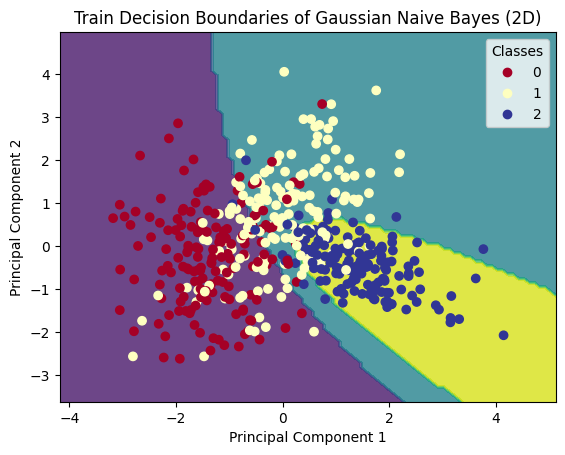

In [54]:
#@title Train Decision Boundaries of Gaussian Naive Bayes (2D)

from sklearn.decomposition import PCA
from tqdm import tqdm

# Reduce the dimensionality of the data to 2 using PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(x_train)

# Create a grid of points for visualization in the reduced 2D space
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Use the GNB model to predict class labels for the grid points in the original 13D space
grid_points = pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()])
print(grid_points.shape)
Z = classify_point_gaussian_naive_bayes(grid_points)
Z = Z.reshape(xx.shape)

# Plot the decision boundaries and the data points in the reduced 2D space
plt.contourf(xx, yy, Z, alpha=0.8)
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_train, cmap=plt.cm.RdYlBu)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Add a legend
handles, labels = scatter.legend_elements()
plt.legend(handles, labels, title='Classes')

plt.title('Train Decision Boundaries of Gaussian Naive Bayes (2D)')
plt.show()

(7031, 4)


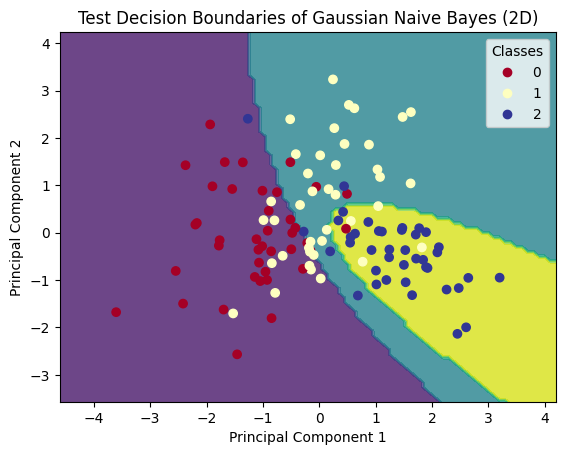

In [55]:
#@title Train Decision Boundaries of Gaussian Naive Bayes (2D)

from sklearn.decomposition import PCA
from tqdm import tqdm

# Reduce the dimensionality of the data to 2 using PCA
X_reduced = pca.transform(x_test)

# Create a grid of points for visualization in the reduced 2D space
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Use the GNB model to predict class labels for the grid points in the original 13D space
grid_points = pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()])
print(grid_points.shape)
Z = classify_point_gaussian_naive_bayes(grid_points)
Z = Z.reshape(xx.shape)

# Plot the decision boundaries and the data points in the reduced 2D space
plt.contourf(xx, yy, Z, alpha=0.8)
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_test, cmap=plt.cm.RdYlBu)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Add a legend
handles, labels = scatter.legend_elements()
plt.legend(handles, labels, title='Classes')

plt.title('Test Decision Boundaries of Gaussian Naive Bayes (2D)')
plt.show()

## Question 2 - Naive Bayes

In this problem, you’ll implement a basic Naïve Bayes classifier, and use it to predict an emotion by description. <br/>
You will have to classify the sentences into 6 categories, <b>but could be any number.</b><br/>
The categories are {'sadness', 'joy', 'love', 'fear', 'anger', 'ambiguous'}. <br/>

<b>Warning:</b> I haven't personally looked at all the data here. Even though the data is taken from a ML databases site, accept my apologies if there are any offensive sentence.


# import libarires

In [56]:
import numpy as np
import pandas as pd
import math
from sklearn.feature_extraction.text import CountVectorizer

Implement the function. It reads all tweets from file and returns the following data structures: <br/>
•	texall - list of documents; each entry corresponds to a tweet which is list of words. <br/>
•	lbAll list of tweets' labels.<br/>
•	voc - set of all distinct words in the file.<br/>
•	cat - set of tweets categories.


In [57]:
def readTrainData(file_name):
    df = pd.read_csv(file_name)

    tweets = df['text'].tolist()
    labels = df['label'].tolist()

    vectorizer = CountVectorizer(tokenizer=lambda x: x, preprocessor=lambda x: x, token_pattern=None)
    texAll = [tweet.split() for tweet in tweets]
    X = vectorizer.fit_transform(texAll)
    _voc = vectorizer.get_feature_names_out()

    cat = set(labels)
    voc = set(_voc)
    return texAll, labels, voc, cat


Implement the function, which computes and returns the probabilities (on the train set):<br/>
- $P_w$ - a matrix of class-conditional probabilities, $p(x|w_i)$
- $P$ - a vector of class priors, $p(w_i)$

Make sure you deal with the case of word that appears in voc but not in class $w$.

In [58]:
def learn_NB_text():
    global texAll_train, lblAll_train, voc, cat

    num_docs = len(texAll_train)
    num_classes = len(cat)
    class_index = {c: i for i, c in enumerate(cat)}
    vocab = list(voc)
    vocab_size = len(vocab)

    # Calculate class priors P(w_i)
    class_counts = {c: 0 for c in cat}
    for label in lblAll_train:
        class_counts[label] += 1
    P = np.array([class_counts[c] / num_docs for c in cat])

    # Calculate conditional probabilities P(x|w_i)
    word_counts = {c: {word: 0 for word in vocab} for c in cat}
    for text, label in zip(texAll_train, lblAll_train):
        for word in text:
            if word in word_counts[label]:
                word_counts[label][word] += 1

    Pw = np.zeros((num_classes, vocab_size))
    for c in cat:
        total_words_in_class = sum(word_counts[c].values())
        for i, word in enumerate(vocab):
            Pw[class_index[c], i] = (word_counts[c][word] + 1) / (total_words_in_class + vocab_size)

    return Pw, P


Implement fhe function that classifies all tweets from the test set and computes the success rate.<br/>
Iterate over all tweets of test and for each tweet find the most probable category.
<br/><br/>
Note1: Multiplying lots of probabilities, which are between 0 and 1, can result in floating-point underflow. Since log(xy) = log(x) + log(y), it is better to perform all computations by summing logs of probabilities rather than multiplying probabilities. <br/>Class with highest final un-normalized log probability score is still the most probable.


In [59]:
def ClassifyNB_text(Pw, P):
    global texAll_test, lblAll_test, voc, cat

    class_index = {c: i for i, c in enumerate(cat)}
    vocab = list(voc)
    vocab_index = {word: i for i, word in enumerate(vocab)}

    correct_count = 0
    num_classes = len(cat)

    for text, true_label in zip(texAll_test, lblAll_test):
        log_probs = np.log(P)

        for word in text:
            if word in vocab_index:
                word_idx = vocab_index[word]
                log_probs += np.log(Pw[:, word_idx])

        predicted_label = max(cat, key=lambda c: log_probs[class_index[c]])

        if predicted_label == true_label:
            correct_count += 1

    success_rate = correct_count / len(texAll_test)
    return success_rate

Read the files

In [60]:
TRAIN_FILE = 'https://sharon.srworkspace.com/ml/datasets/hw1/emotions_train.csv'
TEST_FILE = 'https://sharon.srworkspace.com/ml/datasets/hw1/emotions_test.csv'

texAll_train, lblAll_train, voc, cat = readTrainData(TRAIN_FILE)

# cats must be the same at train and test
# voc of test is irrelevant - we already trained on other voc.
texAll_test, lblAll_test, _, __ = readTrainData(TEST_FILE)

Train the model, classify it on the test and report the success rate

In [61]:
Pw, P = learn_NB_text()
sum_right = ClassifyNB_text(Pw, P)
print(sum_right)

0.7665


## Question 3 - KNN
You want to detect stars into 6 types of stars by measuring their properties. <br/> NASA gave you their dataset, including temperature, color, Spectral_Class and more. <br/> In addition, you aim to compare different distance metric to determine which one is the best for this data.

# import libaries

In [62]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the data, print the first three rows<br/>
https://sharon.srworkspace.com/ml/datasets/hw1/Stars.csv

In [63]:
url ="https://sharon.srworkspace.com/ml/datasets/hw1/Stars.csv"
star_data=pd.read_csv(url,sep=";")
star_data=star_data.dropna()
star_data.head(3)

# Split the single column name string into individual column names if needed
if len(star_data.columns) == 1:
    star_data = star_data[star_data.columns[0]].str.split(',', expand=True)
    star_data.columns = ['Temperature', 'L', 'R', 'A_M', 'Color', 'Spectral_Class', 'Type']


Convert categorial features to discerete values

In [64]:
df = star_data

colors = df['Color'].unique()
for idx, color in enumerate(colors):
    df['Color'] = df['Color'].replace({color: idx})

spec_class = df['Spectral_Class'].unique()
for idx, spec in enumerate(spec_class):
    df['Spectral_Class'] = df['Spectral_Class'].replace({spec: idx})

print(df.head(3))


  Temperature       L       R    A_M  Color  Spectral_Class Type
0        3068  0.0024    0.17  16.12      0               0    0
1        3042  0.0005  0.1542   16.6      0               0    0
2        2600  0.0003   0.102   18.7      0               0    0


Check the correlation matrix between the features. <br/>
Which distance metric do you expect to work better: Euclidean distance, of the Mahalanobis distance? <br/>
<font color='red'>Write here your answer and explain it</font>

<font color='red'><b>Choosing which distance metric requires us to have knowledge of the euclidean distance and the mahalanobis distance and their relationship with the correlation matrix :
Euclidean distance is the straight-line distance between two points in Euclidean space. It is easy to compute and interpret, but it assumes that the features are uncorrelated and have the same scale.
where as Mahalanobis distance accounts for the correlations between features and the scale of the data. It can handle cases where the features are correlated and have different scales.
By examining the correlation matrix, you can determine if there are significant correlations between your features. If the correlation coefficients are high (close to 1 or -1), Mahalanobis distance might be a better choice. If the features are mostly uncorrelated and have similar scales, Euclidean distance might suffice.
Since most of the correlation coefficients in the correlation matrix are relatively high that means that using the Mahalanobis distance is the better choice in this case

 <font color='green'> solved </font>


 </font>
 </b>

                Temperature         L         R       A_M     Color  \
Temperature        1.000000  0.393404  0.064216 -0.420261  0.535934   
L                  0.393404  1.000000  0.526516 -0.692619  0.199249   
R                  0.064216  0.526516  1.000000 -0.608728 -0.062509   
A_M               -0.420261 -0.692619 -0.608728  1.000000 -0.352271   
Color              0.535934  0.199249 -0.062509 -0.352271  1.000000   
Spectral_Class     0.527404  0.409473  0.001467 -0.433673  0.701516   
Type               0.411129  0.676845  0.660975 -0.955276  0.409732   

                Spectral_Class      Type  
Temperature           0.527404  0.411129  
L                     0.409473  0.676845  
R                     0.001467  0.660975  
A_M                  -0.433673 -0.955276  
Color                 0.701516  0.409732  
Spectral_Class        1.000000  0.477165  
Type                  0.477165  1.000000  


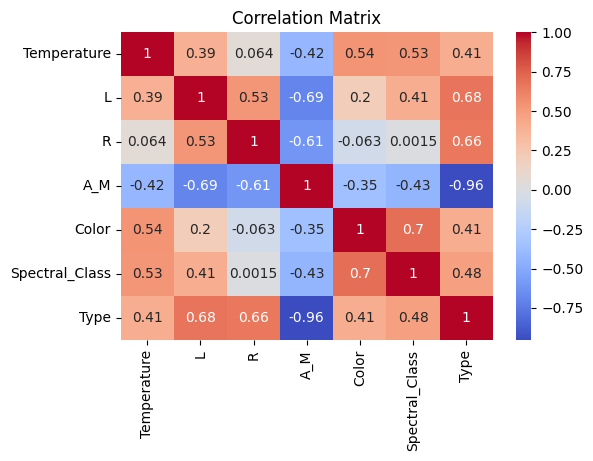

In [65]:
# Ensure all data is numeric
df = df.apply(pd.to_numeric)

correlation_matrix = star_data.corr()
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
import seaborn as sns
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Split the data to 90% train and 10% test, with random state 42. <br/>
Afterwards, split the train into 80% train and 20% validation, also with random state of 42<br/>
Make sure to maintain the dataset balanced, using stratify=y, in train_test_split method. <br/> You can check the balance using df.value_counts().

In [66]:
X=df.drop('Type',axis = 1)
y=df['Type']

# 1 split: 90% train, 10% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

# 2 split: 80% of train to training, 20% to validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

print("Training set class distribution:\n", y_train.value_counts())
print("Validation set class distribution:\n", y_val.value_counts())
print("Test set class distribution:\n", y_test.value_counts())


Training set class distribution:
 Type
5    29
1    29
0    29
2    29
4    28
3    28
Name: count, dtype: int64
Validation set class distribution:
 Type
4    8
3    8
5    7
0    7
1    7
2    7
Name: count, dtype: int64
Test set class distribution:
 Type
2    4
1    4
0    4
5    4
3    4
4    4
Name: count, dtype: int64


Implement the function 'Euclidian'. <br/>
This function gets train and test datasets ($m\times d, n\times d$) and returns the distance metric sized $m \times n$, based on euclidian distance metric


In [67]:
def Euclidean(test, data):
  distances = np.zeros((test.shape[0], data.shape[0]))
  for i in range(test.shape[0]):
      for j in range(data.shape[0]):
          diff = test[i, :] - data[j, :]
          distances[i, j] = np.sqrt(np.sum(diff ** 2))
  return distances


def Mahalanobis(test, data):
  distances = np.zeros((test.shape[0], data.shape[0]))
  covariance_matrix_data = np.cov(data, rowvar=False)

  for i in range(test.shape[0]):
      for j in range(data.shape[0]):
          diff =  test[i] - data[j]
          distances[i, j] = np.sqrt(np.dot(np.dot(diff, np.linalg.inv(covariance_matrix_data)), diff.T))
  return distances


Implement the function kNN_classify that returns array sized m, which are the predictions for the m test samples.

In [68]:
def kNN_classify(data, labels, test, k, metric='Euclidean' ,P=None):
    data = data.values
    test = test.values

    if metric == 'Minkowski':
      arguments = (test, data,P)
    else:
       arguments = (test, data)
    distances = eval(f'{metric}(*arguments)')   # returns np.ndarray of shape (m, n) by the given metric

    predictions = np.zeros(test.shape[0], dtype=int)

    for i in range(test.shape[0]):
        K_nearest_neighbors_indices = np.argsort(distances[i])[:k]
        K_nearest_labels = labels.iloc[K_nearest_neighbors_indices]
        predictions[i] = np.bincount(K_nearest_labels).argmax()

    return predictions

Look at the plots for different k values. Note that the Mahalanobis distance metric is already implemented to you above. <br/>Run the following code and compare the performance of Mahalanobis vs Euclidian, specifically as function of k. <br/>
<font color='red'>Write here your answer and explain it</font>

<font color='red'>
<ul>

<li><font color='red'> Euclidean Distance Plot: </font></li>
<font color='red'>
The spike in accuracy around k=3 indicates that considering a small number of neighbors is beneficial for this dataset with the Euclidean distance metric. This suggests that the nearest neighbors are more representative of the local structure of the data.
The drop in accuracy as k increases beyond k=3 may be due to the inclusion of more distant points in the decision-making process, leading to less reliable predictions.
The subsequent fluctuations in accuracy with increasing k could be attributed to the balance between bias and variance. With larger values of k, the bias tends to increase (as more neighbors are considered), while the variance decreases. This trade-off may result in fluctuations in accuracy.
</font>
<li><font color='red'> Mahalanobis Distance Plot: </font> </li>
<font color='red'>
The high initial accuracy with k=1 suggests that considering only the closest neighbor based on Mahalanobis distance yields accurate predictions. This indicates that the Mahalanobis distance metric captures the underlying data distribution effectively, leading to more accurate classifications.
The spike in accuracy around k=9 further supports the effectiveness of the Mahalanobis distance metric, indicating that a small number of neighbors can provide highly informative insights into the dataset's structure.
The drop in accuracy as k increases beyond certain points may be attributed to the introduction of noise from less relevant neighbors, leading to less reliable predictions. </font>
</ul>
</br>
<b>
Overall, the observed patterns suggest that the Mahalanobis distance metric performs better than the Euclidean distance metric for this dataset(which also supports our earlier understanding regarding the correlation matrix and how the mahalanobis distance will give better results), especially when considering a small number of neighbors. Additionally, the choice of k significantly impacts the accuracy of the k-NN algorithm, highlighting the importance of tuning this hyperparameter appropriately.
</b>
</font>


 <font color='green'> solved </font>


Look at the plots for different k values. Note that the Mahalanobis distance metric is already implemented to you above.
Run the following code and compare the performance of Mahalanobis vs Euclidian, specifically as function of k.


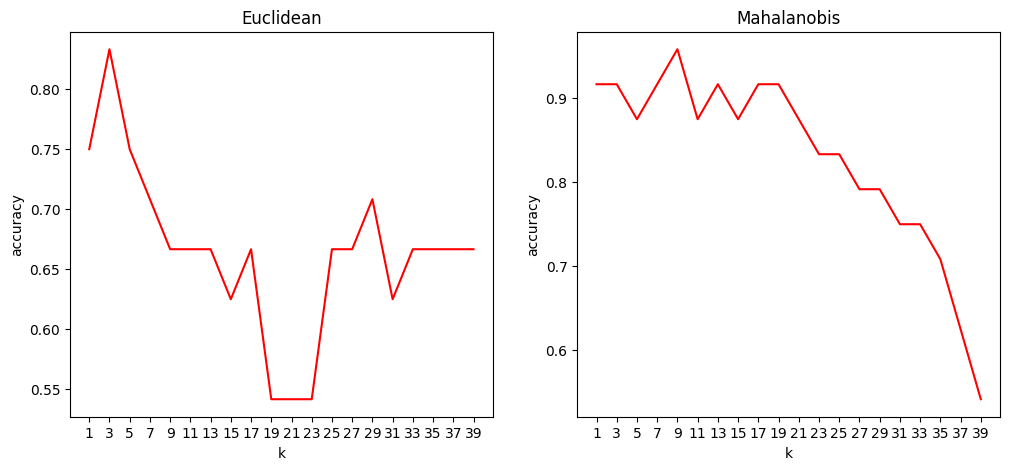

In [69]:
metrics = ['Euclidean', 'Mahalanobis']
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

for idx, metric in enumerate(metrics):
    ks = np.arange(1, 41, 2)
    accs = []
    for k in ks:
        predictions = kNN_classify(X_train, y_train, X_test, k, metric,0)
        accuracy = np.mean(predictions == y_test)
        accs.append(accuracy)

    axs[idx].plot(ks, accs, color='red')
    axs[idx].set_xlabel('k')
    axs[idx].set_ylabel('accuracy')
    axs[idx].set_title(metric)
    axs[idx].set_xticks(ks)

plt.show()

Now, we implement the $L_p$ norm distance metric. Reminder:
$$ d(x,y)=||x-y||_p=\left(\sum_{i=1}^d |x_i-y_i|^p\right)^{\frac{1}{p}} $$
Remark: $L_1$ is the Manhattan distance and $L_2$ is the Euclidian.

In [70]:
def Minkowski(test, data, p):
    distances = np.zeros((test.shape[0], data.shape[0]))
    for i in range(test.shape[0]):
        for j in range(data.shape[0]):
            diff = np.abs(test[i] - data[j]) ** p
            distances[i, j] = np.sum(diff) ** (1 / p)

    return distances


Find the hyperparameter p that fits best to this problem (between 1-10)

In [71]:
best_p = None
best_accuracy = 0

for p in range(1, 11):
    predictions = kNN_classify(X_train, y_train, X_val, 5, metric ='Minkowski',P=p)
    accuracy = np.mean(predictions == y_val)
    print(f"p={p}: {accuracy:.3f}")
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_p = p

print(f"Best value of p: {best_p} with accuracy: {best_accuracy:.3f}")

p=1: 0.705
p=2: 0.682
p=3: 0.682
p=4: 0.682
p=5: 0.682
p=6: 0.682
p=7: 0.682
p=8: 0.682
p=9: 0.682
p=10: 0.682
Best value of p: 1 with accuracy: 0.705


For that p, print the accuracy on the test as function of k. Is it really better  than the first two matrices? <br/>
<font color='red'>Write here your answer and explain it</font>

<font color='red'>
No it is not really better than the first two matrices ( mahalanobis and euclidian) from what i can see the accuracy graph of the minkowski for the best p which is 1 has the same accuracy more or less with the euclidian distance , and thus it is worse than the mahalanobis distance.
</font>

 <font color='green'> solved </font>


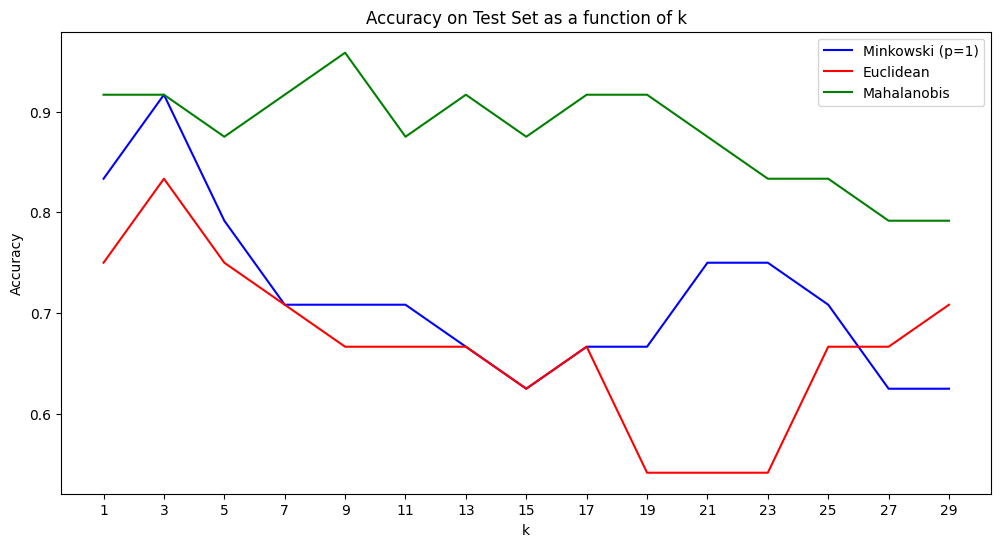

In [72]:
ks = np.arange(1, 30, 2)
accs = []
best_p = 1      # You may change the usage of p according to your previous implementation

for k in ks:
    predictions = kNN_classify(X_train, y_train, X_test, k, metric='Minkowski', P=best_p)
    accuracy = np.mean(predictions == y_test)
    accs.append(accuracy)

test_accs_euclidean = []
test_accs_mahalanobis = []

for k in ks:
    predictions_euclidean = kNN_classify(X_train, y_train, X_test, k, metric='Euclidean')
    accuracy_euclidean = np.mean(predictions_euclidean == y_test)
    test_accs_euclidean.append(accuracy_euclidean)

    predictions_mahalanobis = kNN_classify(X_train, y_train, X_test, k, metric='Mahalanobis')
    accuracy_mahalanobis = np.mean(predictions_mahalanobis == y_test)
    test_accs_mahalanobis.append(accuracy_mahalanobis)

plt.figure(figsize=(12, 6))
plt.plot(ks, accs, label=f'Minkowski (p={best_p})', color='blue')
plt.plot(ks, test_accs_euclidean, label='Euclidean', color='red')
plt.plot(ks, test_accs_mahalanobis, label='Mahalanobis', color='green')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy on Test Set as a function of k')
plt.legend()
plt.xticks(ks)
plt.show()

### Thats it!
If you choose to continue, 5 pts bonus!

We are going to classify the fashion MNIST data.<br/>
First, load the the train and test from:
- https://sharon.srworkspace.com/ml/datasets/hw1/fashion-mnist_train.csv
- https://sharon.srworkspace.com/ml/datasets/hw1/fashion-mnist_test.csv

Seconly, convert it to numpy and obtain the train and test data & labels

In [73]:
import pandas as pd
import numpy as np

train_url = "https://sharon.srworkspace.com/ml/datasets/hw1/fashion-mnist_train.csv"
test_url = "https://sharon.srworkspace.com/ml/datasets/hw1/fashion-mnist_test.csv"

train_df = pd.read_csv(train_url)
test_df = pd.read_csv(test_url)

train_data = train_df.to_numpy()
test_data = test_df.to_numpy()

X_train = train_data[:, 1:]
y_train = train_data[:, 0]
X_test = test_data[:, 1:]
y_test = test_data[:, 0]

print(f'X_train shape: {X_train.shape}, y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}, y_test shape: {y_test.shape}')


X_train shape: (2000, 784), y_train shape: (2000,)
X_test shape: (2000, 784), y_test shape: (2000,)


dispaly some random image

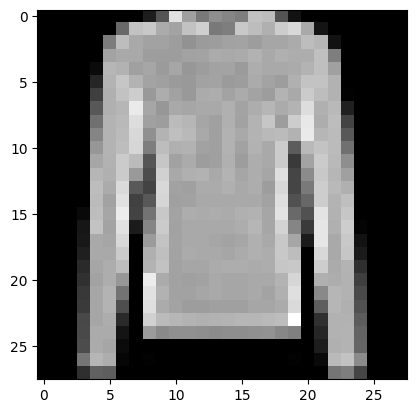

In [74]:
import matplotlib.pyplot as plt
idx = np.random.randint(len(X_train))
plt.imshow(X_train[idx].reshape(28,28), cmap='gray')
plt.show()

Use some google to search for appropriate distance metric that should classify correctly images. From what you read, explain yourselves, why is it a good distance metric?<br/>
<font color='red'>Write here your answer and explain it</font>

<font color='red'>
Recommended Metric: Mahalanobis Distance
Mahalanobis Distance is particularly suitable for classifying images in the Fashion MNIST dataset for several reasons:

1) Data Distribution Awareness: Mahalanobis distance accounts for the variance and correlation structure of the data. This is important in image classification, where pixel values can be correlated, and the scale of different features (pixels) can vary.
</font>

<font color='red'>
2) Robustness to Scaling and Correlations: Unlike Euclidean distance, which treats all features equally and is sensitive to differences in scale, Mahalanobis distance adjusts for these differences. This makes it more robust to feature scaling issues, which are common in image data.
</font><br/>

<font color='red'>
3) Dimensionality Handling: Fashion MNIST images are 28x28 pixels, resulting in a 784-dimensional space. Mahalanobis distance can handle high-dimensional spaces better by considering the internal correlations within the data, which helps mitigate the curse of dimensionality to some extent.
</font><br/>

<font color='red'>
4)Empirical Success: In many empirical studies and applications, Mahalanobis distance has shown superior performance in image classification tasks compared to other metrics. This is due to its ability to adapt to the underlying data distribution more effectively.
</font><br/>


<font color='red'>
Conclusion:
Mahalanobis distance is a powerful metric for image classification tasks like those involving the Fashion MNIST dataset. Its ability to incorporate data correlations and adjust for feature scaling makes it particularly well-suited for high-dimensional, structured data typical of images. While it is computationally more intensive, the benefits in terms of classification accuracy and robustness often outweigh the computational costs, especially with modern computing resources.

</font>

Now, use the sklearn package of KNN with the metric you chose and print a graph of accuracy on the test, as function of k.<br/>
Were you correct?

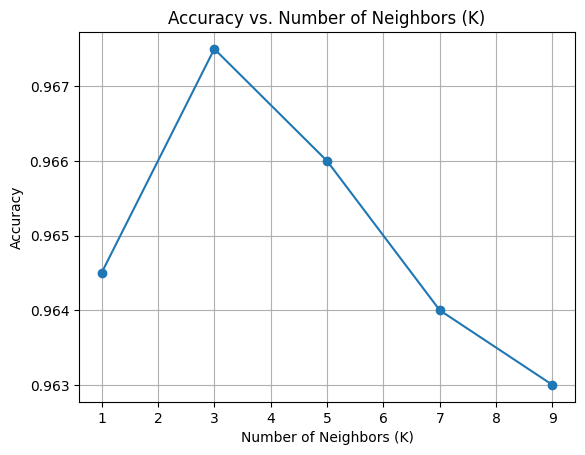

In [75]:
from sklearn.neighbors import KNeighborsClassifier

k_values = [1, 3, 5, 7, 9]

accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')

    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)

    correct_predictions = np.sum(y_pred == y_test)
    total_predictions = len(y_test)
    accuracy = correct_predictions / total_predictions

    accuracies.append(accuracy)


plt.plot(k_values, accuracies, marker='o')
plt.title('Accuracy vs. Number of Neighbors (K)')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


## Question 4 - Parzen Windoes
See attached PDF in Moodle